# Задание 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred) ** 2)
    return err

## Генерация набора данных

In [3]:
import sklearn.datasets as datasets

data, target, coef = datasets.make_regression(n_samples=10000, n_features = 2, n_informative = 2, n_targets = 1, 
                                              noise = 5, coef = True, random_state = 2)

## Масштабирование методом стандартизации

In [4]:
means = np.mean(data, axis=0)
stds = np.std(data, axis=0)

for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        data[i][j] = (data[i][j] - means[j]) / stds[j]
        
data = data.T

## Обучение модели при помощи градиентного спуска

In [5]:
def eval_model(X, y, iterations, alpha=1e-2):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    errors = []
    for i in range(iterations):
        y_pred = np.dot(W, X)
        errors.append(calc_mse(y, y_pred))
        W -= alpha * (1 / n * 2 * np.sum(X * (y_pred - y), axis=1))
    return errors

Text(0, 0.5, 'MSE')

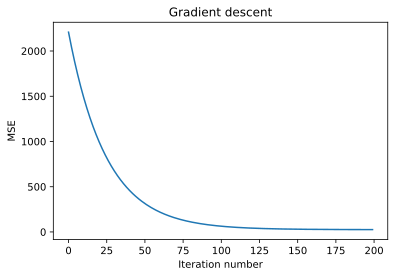

In [6]:
errors = eval_model(data, target, 200)

plt.plot(range(len(errors)), errors)
plt.title('Gradient descent')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

In [7]:
print(f"Last MSE: {errors[-1]}")

Last MSE: 25.87294097319734


## Обучение модели при помощи стохастического градиентного спуска

In [8]:
def eval_sgd_model(X, y, iterations, qty_in_batch=5, alpha=1e-2):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    errors = []
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    for i in range(iterations):
        for b in range(n_batch):
            start_ = qty_in_batch * b
            end_ = qty_in_batch * (b + 1)
            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_mse(y_tmp, y_pred_tmp)
            W -= alpha * (1 / n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T))
        errors.append(err)
    return errors

Text(0, 0.5, 'MSE')

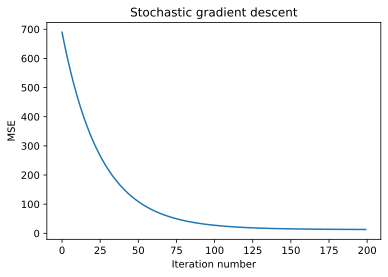

In [9]:
errors_sgd = eval_sgd_model(data, target, 200)

plt.plot(range(len(errors_sgd)), errors_sgd)
plt.title('Stochastic gradient descent')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

In [10]:
print(f"Last MSE: {errors_sgd[-1]}")

Last MSE: 13.12147938426549


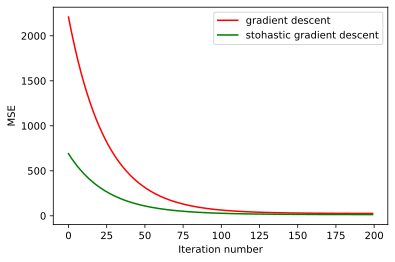

In [11]:
plt.plot(range(len(errors)), errors, color='r', label='gradient descent')
plt.plot(range(len(errors_sgd)), errors_sgd, color='g', label='stohastic gradient descent')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.legend()

Стохастический градиентный спуск показывает меньшую MSE, однако затрачивает больше времени на обучение.

# Задание 2

In [12]:
def eval_model_reg2(X, y, iterations, alpha=1e-2, lambda_=1e-8):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    errors = []
    for i in range(iterations):
        y_pred = np.dot(W, X)
        errors.append(calc_mse(y, y_pred))
        W -= alpha * (1 / n * 2 * np.sum(X * (y_pred - y), axis=1)) + lambda_ * W
    return errors

In [13]:
def eval_sgd_model_reg2(X, y, iterations, qty_in_batch=5, alpha=1e-2, lambda_=1e-8):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    errors = []
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    for i in range(iterations):
        for b in range(n_batch):
            start_ = qty_in_batch * b
            end_ = qty_in_batch * (b + 1)
            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_mse(y_tmp, y_pred_tmp)
            W -= alpha * (1 / n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)) + lambda_ * W
        errors.append(err)
    return errors

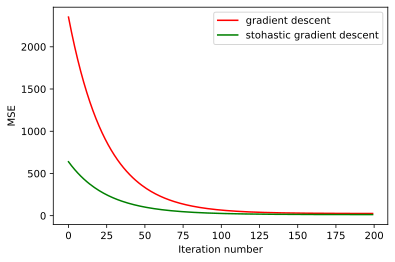

In [14]:
errors = eval_model_reg2(data, target, 200)
errors_sgd = eval_sgd_model_reg2(data, target, 200)

plt.plot(range(len(errors)), errors, color='r', label='gradient descent')
plt.plot(range(len(errors_sgd)), errors_sgd, color='g', label='stohastic gradient descent')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.legend()

In [15]:
print(f"Last MSE: {errors[-1]}")
print(f"Last MSE (SGD): {errors_sgd[-1]}")

Last MSE: 25.926155887536336
Last MSE (SGD): 13.1119967435416
